<a href="https://colab.research.google.com/github/devvdpatel/Formula1-ExploratoryDataAnalysis/blob/main/F1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import all necessary packagee
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#!pip install mplcursors
import mplcursors as mpc


%matplotlib inline

In [ ]:
#loading data and assign columns
results  = pd.read_csv('results.csv')
races = pd.read_csv('races.csv')
drivers = pd.read_csv('drivers.csv')
constructors = pd.read_csv('constructors.csv')

In [ ]:
#merge datatsets
df = pd.merge(results, races[['raceId', 'year', 'name', 'round']], on = 'raceId', how = 'left')
df = pd.merge(df, drivers[['driverId', 'driverRef', 'nationality']], on = 'driverId', how = 'left')
df = pd.merge(df, constructors[['constructorId', 'name', 'nationality']], on = 'constructorId', how = "left")

In [ ]:
#drop columns not needed
df.drop(['number', 'position', 'positionText', 'laps', 'fastestLap', 'statusId', 'resultId',
         'raceId', 'driverId', 'constructorId'], axis = 1, inplace = True)

In [ ]:
#rename columns
df.rename(columns = {'rank' : 'fastestLapRank', 'name_x' : 'gpName',
                     'nationality_x' : 'driverNationality', 'name_y' : 'constructorName',
                     'nationality_y': 'constructorNationality', 'driverRef' : 'driver'}, inplace = True)

In [ ]:
#rearrange colummns
desiredOrder = ['year', 'gpName', 'round', 'driver', 'constructorName', 'grid', 'positionOrder', 'points', 'time', 'milliseconds',
    'fastestLapRank', 'fastestLapTime', 'fastestLapSpeed', 'driverNationality', 'constructorNationality']
df = df.reindex(columns = desiredOrder)

In [ ]:
#sort values
df = df.sort_values(by = ['year', 'round', 'positionOrder'], ascending = [False, True, True])

In [ ]:
#replace all empty or \N values in all possible columns
df.time.replace('\\N', np.nan, inplace = True)
df.milliseconds.replace('\\N', np.nan, inplace = True)
df.fastestLapRank.replace('\\N', np.nan, inplace = True)
df.fastestLapTime.replace('\\N', np.nan, inplace = True)
df.fastestLapSpeed.replace('\\N', np.nan, inplace = True)

In [ ]:
#chage datatypes
df.fastestLapSpeed = df.fastestLapSpeed.astype(float)
df.fastestLapRank = df.fastestLapRank.astype(float)
df.milliseconds = df.milliseconds.astype(float)

In [ ]:
#rest index
df.reset_index(drop = True, inplace = True)

In [ ]:
#shape of the dataset
print(df.shape)

(26080, 15)


In [ ]:
#quick look at all column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    26080 non-null  int64  
 1   gpName                  26080 non-null  object 
 2   round                   26080 non-null  int64  
 3   driver                  26080 non-null  object 
 4   constructorName         26080 non-null  object 
 5   grid                    26080 non-null  int64  
 6   positionOrder           26080 non-null  int64  
 7   points                  26080 non-null  float64
 8   time                    7251 non-null   object 
 9   milliseconds            7250 non-null   float64
 10  fastestLapRank          7831 non-null   float64
 11  fastestLapTime          7615 non-null   object 
 12  fastestLapSpeed         7615 non-null   float64
 13  driverNationality       26080 non-null  object 
 14  constructorNationality  26080 non-null

In [ ]:
df.head(10)

,year,gpName,round,driver,constructorName,grid,positionOrder,points,time,milliseconds,fastestLapRank,fastestLapTime,fastestLapSpeed,driverNationality,constructorNationality
0,2023,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,1,25.0,1:33:56.736,5636736.0,6.0,1:36.236,202.452,Dutch,Austrian
1,2023,Bahrain Grand Prix,1,perez,Red Bull,2,2,18.0,+11.987,5648723.0,7.0,1:36.344,202.225,Mexican,Austrian
2,2023,Bahrain Grand Prix,1,alonso,Aston Martin,5,3,15.0,+38.637,5675373.0,5.0,1:36.156,202.620,Spanish,British
3,2023,Bahrain Grand Prix,1,sainz,Ferrari,4,4,12.0,+48.052,5684788.0,14.0,1:37.130,200.588,Spanish,Italian
4,2023,Bahrain Grand Prix,1,hamilton,Mercedes,7,5,10.0,+50.977,5687713.0,10.0,1:36.546,201.802,British,German
5,2023,Bahrain Grand Prix,1,stroll,Aston Martin,8,6,8.0,+54.502,5691238.0,9.0,1:36.546,201.802,Canadian,British
6,2023,Bahrain Grand Prix,1,russell,Mercedes,6,7,6.0,+55.873,5692609.0,17.0,1:37.221,200.401,British,German
7,2023,Bahrain Grand Prix,1,bottas,Alfa Romeo,12,8,4.0,+1:12.647,5709383.0,18.0,1:37.379,200.075,Finnish,Swiss
8,2023,Bahrain Grand Prix,1,gasly,Alpine F1 Team,20,9,2.0,+1:13.753,5710489.0,2.0,1:35.068,204.939,French,French
9,2023,Bahrain Grand Prix,1,albon,Williams,15,10,1.0,+1:29.774,5726510.0,15.0,1:37.144,200.559,Thai,British


In [ ]:
sns.set_palette('Set3')
plt.rcParams['figure.figsize'] = 10,6

([], [])

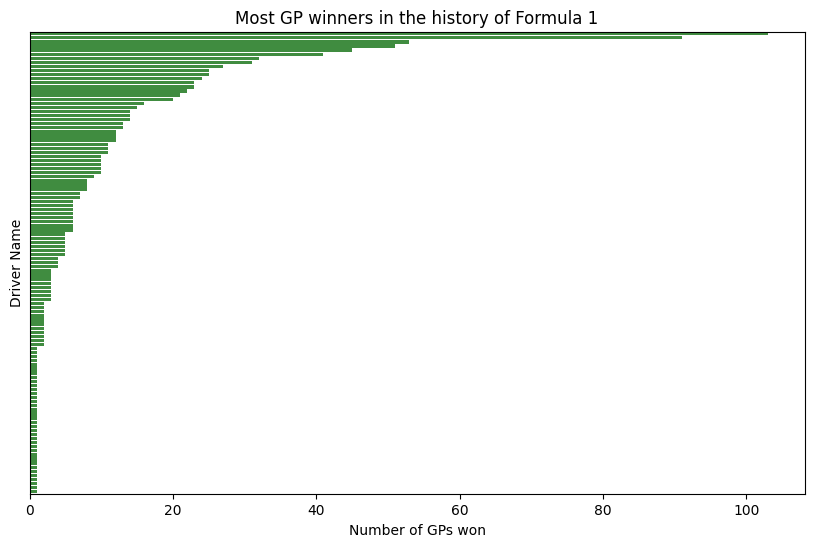

In [ ]:
#GP winners
gpWinners = df.loc[df['positionOrder']==1].groupby('driver')['positionOrder'].count().sort_values(ascending = False).to_frame().reset_index()

#create a Bar Plot
sns.barplot(data = gpWinners, y = 'driver', x = 'positionOrder', color = 'green', alpha = 0.8)
plt.title("Most GP winners in the history of Formula 1")
plt.ylabel('Driver Name')
plt.xlabel('Number of GPs won')
plt.yticks([])

In [ ]:
#top 10 drivers with the most gp wins
top10Drivers = gpWinners.head(10)
print(top10Drivers)

               driver  positionOrder
0            hamilton            103
1  michael_schumacher             91
2              vettel             53
3               prost             51
4      max_verstappen             45
5               senna             41
6              alonso             32
7             mansell             31
8             stewart             27
9               lauda             25


In [ ]:
fig1 = px.histogram(top10Drivers, x = 'positionOrder', y = 'driver', title = "Constructors with most GP wins in the history of Formula 1")
fig1.update_xaxes(title_text = 'Number of wins')
fig1.update_yaxes(title_text = 'Driver Name')
fig1.update_layout(yaxis={'categoryorder':'total ascending'})
fig1.show()


'sns.barplot(data = top10Drivers, y = \'driver\', x = \'positionOrder\', color = \'blue\', alpha = 0.8, linewidth = 0.8, edgecolor = \'black\')\nplt.title("Most GP winners in the history of Formula 1")\nplt.ylabel(\'Driver Name\')\nplt.xlabel(\'Number of GPs won\')'

([], [])

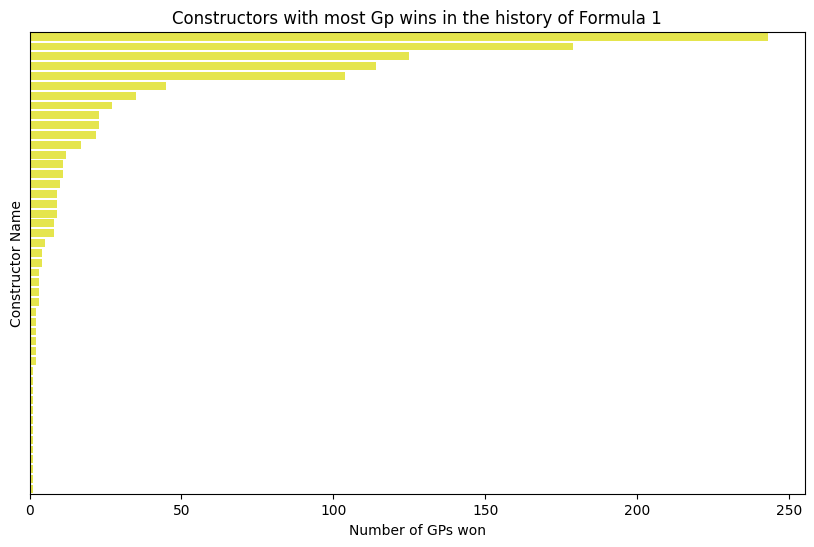

In [ ]:
#constructors with the most gp wins
constructorWinners = df.loc[df['positionOrder']==1].groupby('constructorName')['positionOrder'].count().sort_values(ascending = False).to_frame().reset_index()

#create a Bar Plot
sns.barplot(data = constructorWinners, y = 'constructorName', x = 'positionOrder', color = 'yellow', alpha = 0.8)
plt.title("Constructors with most Gp wins in the history of Formula 1")
plt.ylabel('Constructor Name')
plt.xlabel('Number of GPs won')
plt.yticks([])

In [ ]:
#top 10 constructors with the most wins
#top 10 drivers with the most gp wins
top10Constructors = constructorWinners.head(10)
print(top10Constructors)

#create a chart

fig4 = px.histogram(top10Constructors, x = 'positionOrder', y = 'constructorName', title = "Constructors with most GP wins in the history of Formula 1")
fig4.update_xaxes(title_text = 'Number of wins')
fig4.update_yaxes(title_text = 'Constructor Name')
fig4.update_layout(yaxis={'categoryorder':'total ascending'})
fig4.show()

  constructorName  positionOrder
0         Ferrari            243
1         McLaren            179
2        Mercedes            125
3        Williams            114
4        Red Bull            104
5      Team Lotus             45
6         Renault             35
7        Benetton             27
8         Brabham             23
9         Tyrrell             23


Text(0.5, 0, 'Starting Position')

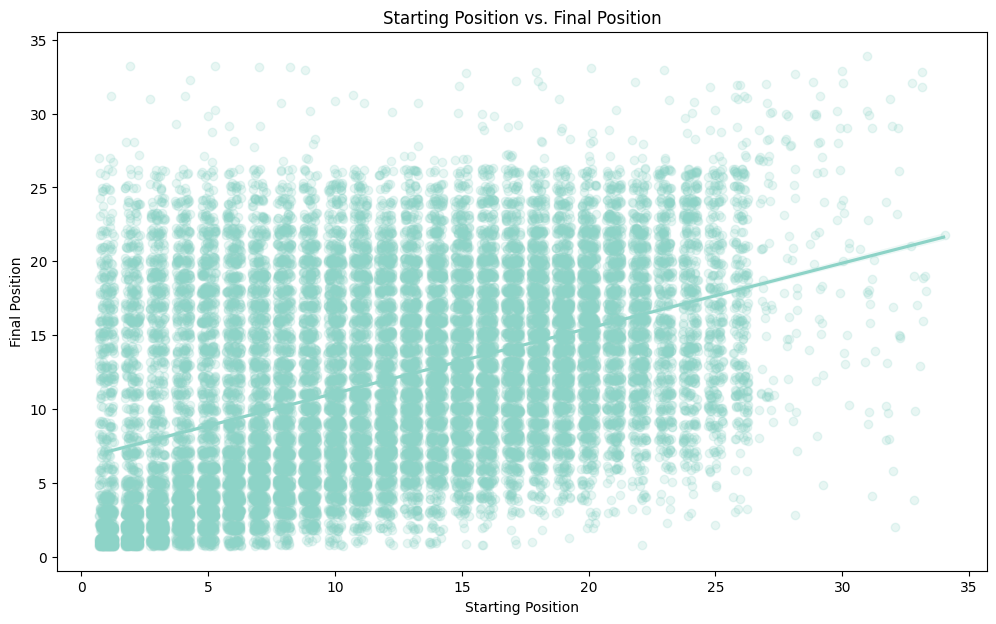

In [ ]:
#data frame after excluding times when a driver started from the pit late
dfStartingPositions = df[df['grid'] != 0]

#create a regression plot
plt.figure(figsize = [12, 7])
sns.regplot(data = dfStartingPositions, x = 'grid', y = 'positionOrder', x_jitter = 0.3, y_jitter = 0.3, scatter_kws = {'alpha' : 1/5})
plt.title('Starting Position vs. Final Position')
plt.ylabel('Final Position')
plt.xlabel('Starting Position')


Text(0.5, 0.98, 'Average top speed of all teams at each GP')

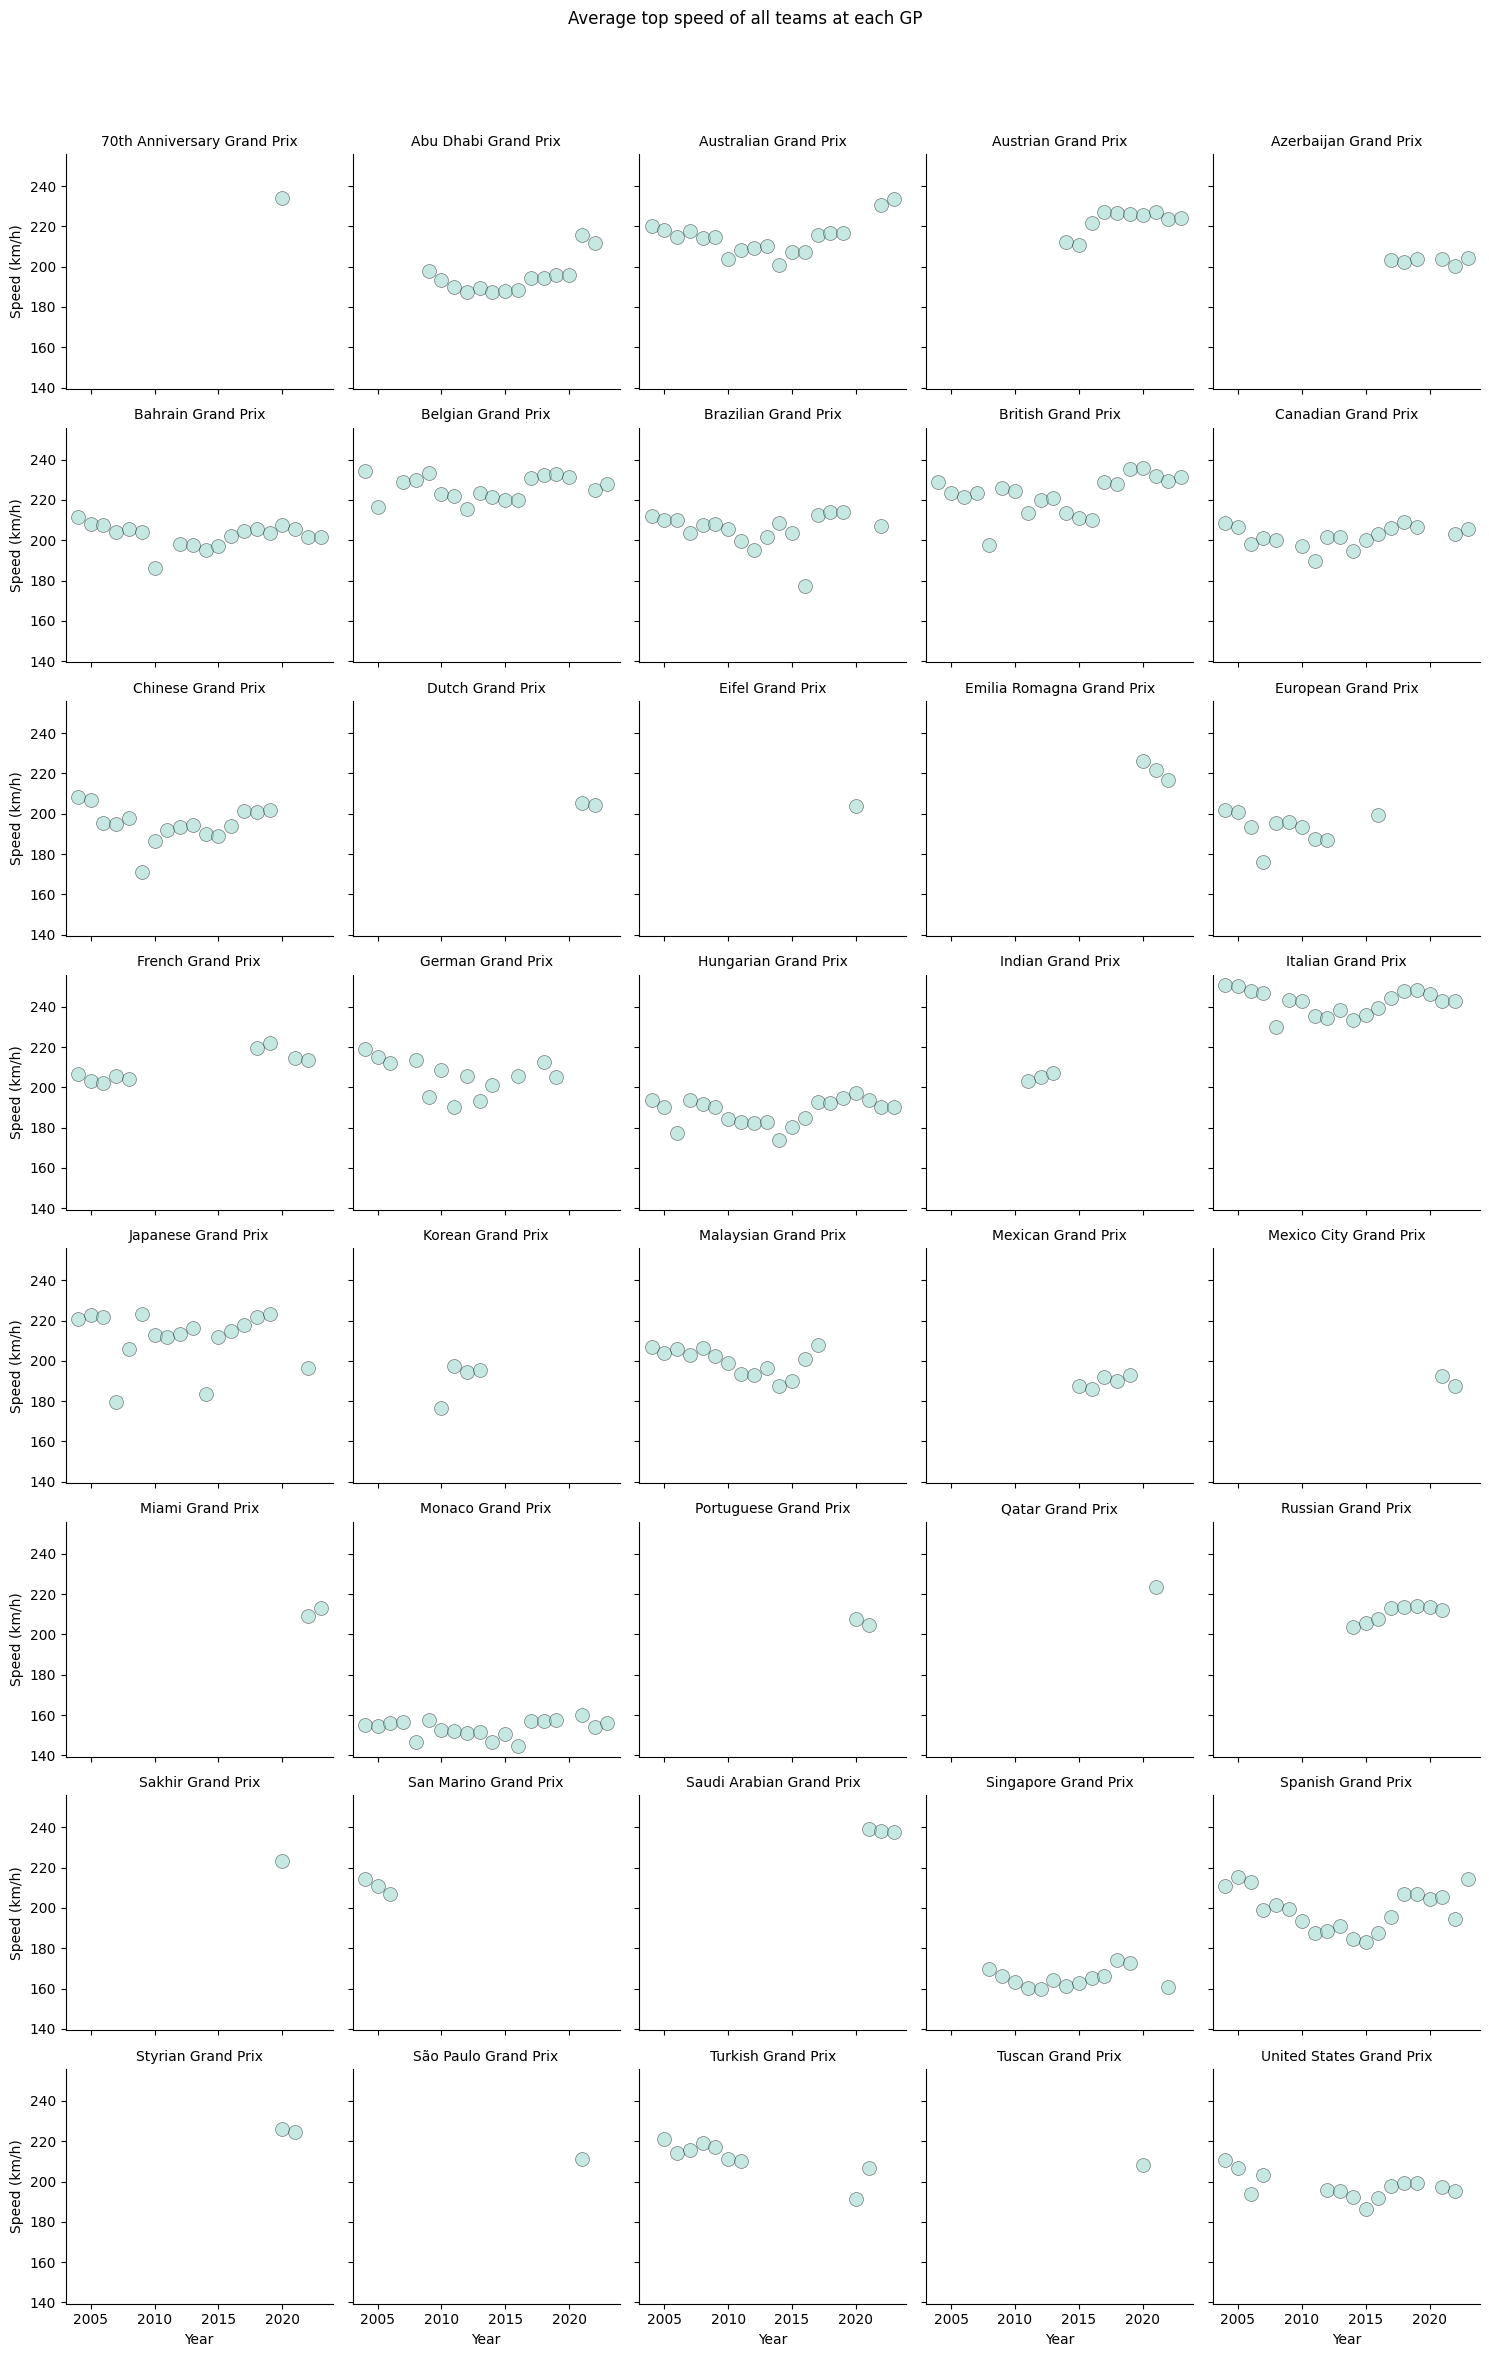

In [ ]:
#how have the f1 car speeds improved over the years
df_speeds = df[df['year'] >= 2004]
df_gp_speeds = df_speeds.groupby(['gpName', 'year'])['fastestLapSpeed'].mean().to_frame().reset_index()

#create a facetgrid
grid = sns.FacetGrid(data = df_gp_speeds, col = 'gpName', col_wrap = 5)
grid.map(plt.scatter, 'year', 'fastestLapSpeed', alpha = 0.5, linewidth = 0.5, edgecolor = 'black', s = 100)
grid.set_titles('{col_name}')
grid.set_xlabels('Year')
grid.set_ylabels('Speed (km/h)')
plt.subplots_adjust(top = 0.92)
grid.fig.suptitle('Average top speed of all teams at each GP')

In [ ]:
#which circuits have hosted the most races
df_circuits =